In [74]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [98]:
def PAC_FND(file):

    df=pd.read_csv(file)
    #df.head()

    #Independent features

    X = df.drop('label',axis=1)
    #X.head()

    #Dependent features

    y = df['label']
    #y.head()
    #df.shape

    #We will be using Count Vectorizer here; also called Bag of Words



    df=df.dropna()

    messages = df.copy()

    messages.reset_index(inplace = True)

    messages.head(10)

    #Now, we will remove all the Stop-words and special characters from the dataset.


    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages['title1_en'][i])
        review = re.sub('[^a-zA-Z]', ' ', messages['title2_en'][i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

    #corpus

    ## Applying Countvectorizer
    # Creating the Bag of Words model

    cv = CountVectorizer(max_features=200,ngram_range=(1,3))
    X = cv.fit_transform(corpus).toarray()

    #X.shape

    #y.unique

    y=messages['label']

    ## Divide the dataset into Train and Test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    cv.get_feature_names_out()[:20]

    cv.get_params()

    count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

    #count_df.head()


    def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


    #Passive Aggressive Classifier Algorithm


    linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

    linear_clf.fit(X_train, y_train)
    pred = linear_clf.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    cm = metrics.confusion_matrix(y_test, pred)
    
    print(classification_report(y_test,pred,target_names = ['unrelated','agreed','diagreed']))
    print(confusion_matrix(y_test,pred))
    
    plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])
    
    return linear_clf

In [101]:
# pred_Label = model_Evaluation(model_PAC, 'test3.csv')

In [100]:
def model_Evaluation(model, testing_file):

    df=pd.read_csv(testing_file)
    #df.head()

    #Independent features
#     X = df

    #X = df.drop('label',axis=1)
    #X.head()

    #Dependent features

    #y = df['label']
    #y.head()
    #df.shape

    #We will be using Count Vectorizer here; also called Bag of Words



    df=df.dropna()

    messages = df.copy()

    messages.reset_index(inplace = True)

#     messages.head(10)

    #Now, we will remove all the Stop-words and special characters from the dataset.


    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages['title1_en'][i])
        review = re.sub('[^a-zA-Z]', ' ', messages['title2_en'][i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

    #corpus

    ## Applying Countvectorizer
    # Creating the Bag of Words model

    cv = CountVectorizer(max_features=200,ngram_range=(1,3))
    X = cv.fit_transform(corpus).toarray()

    #X.shape

    #y.unique

    #y=messages['label']

    ## Divide the dataset into Train and Test

#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#     cv.get_feature_names_out()[:20]

#     cv.get_params()

#     count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

#     #count_df.head()


#     def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
#         """
#         This function prints and plots the confusion matrix.
#         Normalization can be applied by setting `normalize=True`.
#         """
#         plt.imshow(cm, interpolation='nearest', cmap=cmap)
#         plt.title(title)
#         plt.colorbar()
#         tick_marks = np.arange(len(classes))
#         plt.xticks(tick_marks, classes, rotation=45)
#         plt.yticks(tick_marks, classes)

#         if normalize:
#             cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#             print("Normalized confusion matrix")
#         else:
#             print('Confusion matrix, without normalization')

#         thresh = cm.max() / 2.
#         for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#             plt.text(j, i, cm[i, j],
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")

#         plt.tight_layout()
#         plt.ylabel('True label')
#         plt.xlabel('Predicted label')


    #Passive Aggressive Classifier Algorithm


    #linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

#     linear_clf.fit(X_train, y_train)
    pred = model.predict(X)
#     score = metrics.accuracy_score(y_test, pred)
#     print("accuracy:   %0.3f" % score)
#     cm = metrics.confusion_matrix(y_test, pred)
    
#     print(classification_report(y_test,pred,target_names = ['unrelated','agreed','diagreed']))
#     print(confusion_matrix(y_test,pred))
    
#     plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])
    
    return pred

In [106]:
def NB_FND(file):
    from sklearn.naive_bayes import MultinomialNB
    from sklearn import metrics
    import numpy as np
    import itertools

    df=pd.read_csv(file)
    #df.head()

    #Independent features

    X = df.drop('label',axis=1)
    #X.head()

    #Dependent features

    y = df['label']
    #y.head()
    #df.shape

    #We will be using Count Vectorizer here; also called Bag of Words



    df=df.dropna()

    messages = df.copy()

    messages.reset_index(inplace = True)

    messages.head(10)

    #Now, we will remove all the Stop-words and special characters from the dataset.


    ps = PorterStemmer()
    corpus = []
    for i in range(0, len(messages)):
        review = re.sub('[^a-zA-Z]', ' ', messages['title1_en'][i])
        review = re.sub('[^a-zA-Z]', ' ', messages['title2_en'][i])
        review = review.lower()
        review = review.split()

        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

    #corpus

    ## Applying Countvectorizer
    # Creating the Bag of Words model

    cv = CountVectorizer(max_features=200,ngram_range=(1,3))
    X = cv.fit_transform(corpus).toarray()

    #X.shape

    #y.unique

    y=messages['label']

    ## Divide the dataset into Train and Test

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    cv.get_feature_names_out()[:20]

    cv.get_params()

    count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

    #count_df.head()


    def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')


    #Naive Bayes Classifier Algorithm
    classifier=MultinomialNB()


    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    cm = metrics.confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
    
    return classifier

accuracy:   0.714
              precision    recall  f1-score   support

   unrelated       0.71      0.87      0.78        23
      agreed       0.00      0.00      0.00         1
    diagreed       0.71      0.56      0.63        18

    accuracy                           0.71        42
   macro avg       0.48      0.48      0.47        42
weighted avg       0.70      0.71      0.70        42

[[20  0  3]
 [ 0  0  1]
 [ 8  0 10]]
Confusion matrix, without normalization


C:\Users\Aditya Sarwate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditya Sarwate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aditya Sarwate\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

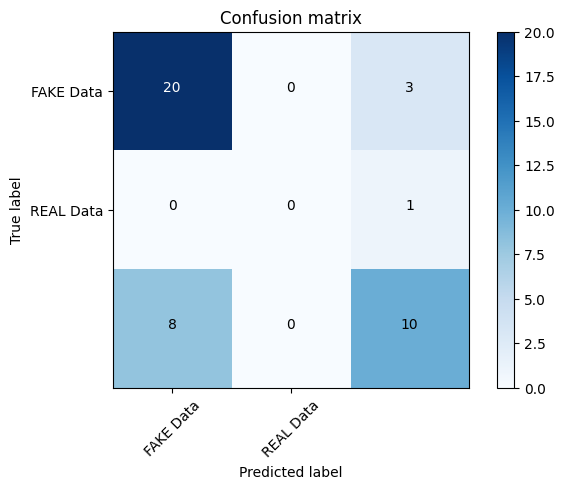

In [107]:
file = 'train2.csv'

#Passive Aggressive Classifier Algorithm
model_PAC = PAC_FND(file)

accuracy:   0.738
Confusion matrix, without normalization


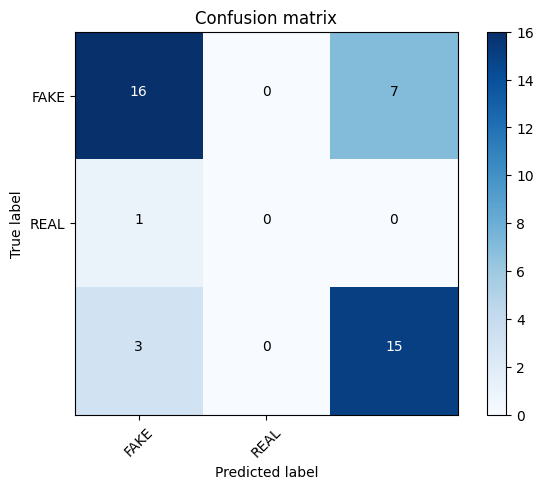

In [109]:
#Naive Bayes Classifier Algorithm
model_PAC = NB_FND(file)